20639it [00:16, 1218.67it/s]


X_train shape: (16511, 80, 80, 3), X_val shape: (4128, 80, 80, 3)
y_train shape: (16511, 15), y_val shape: (4128, 15)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 1, 1, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 220)            │       450,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 15)             │           915 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,275,931 (84.98 MB)

 Trainable params: 469,051 (1.79 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2781 - loss: 2.4312
Epoch 1: val_accuracy improved from -inf to 0.58018, saving model to best_inceptionv3_model.keras
258/258 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - accuracy: 0.2785 - loss: 2.4297 - val_accuracy: 0.5802 - val_loss: 1.3731
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5158 - loss: 1.5036
Epoch 2: val_accuracy improved from 0.58018 to 0.64947, saving model to best_inceptionv3_model.keras
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.5158 - loss: 1.5035 - val_accuracy: 0.6495 - val_loss: 1.1206
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5731 - loss: 1.3083
Epoch 3: val_accuracy improved from 0.64947 to 0.67708, saving model to best_inceptionv3_model.keras
258/258 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.5732 - loss: 1.3083 - val_accuracy: 0.6771 - val_loss: 1.0152
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6054 - loss

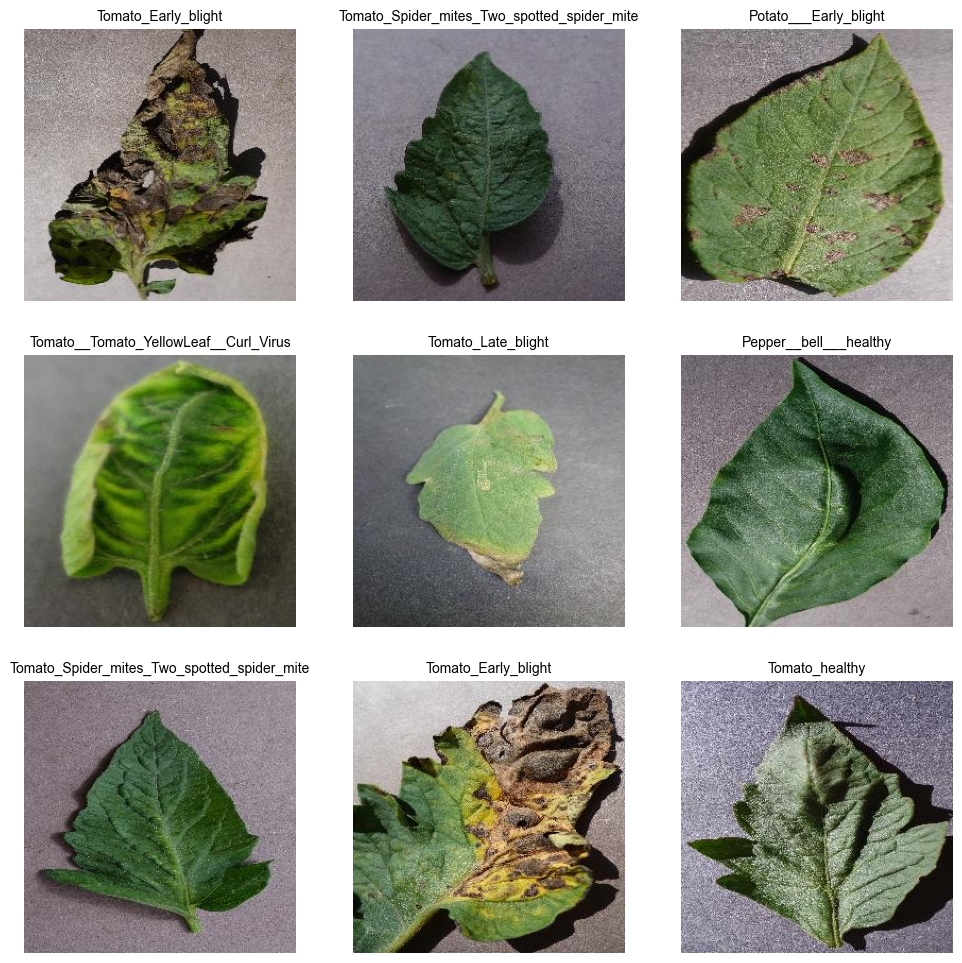

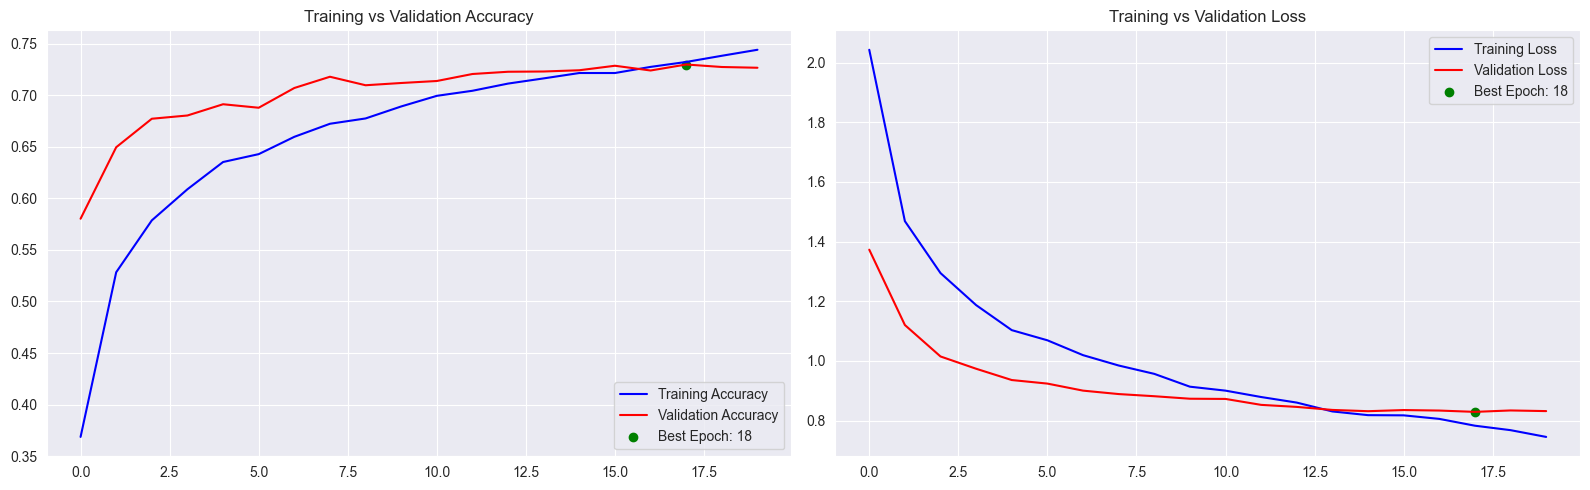

129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7221 - loss: 0.8542
Validation Accuracy: 72.97%
InceptionV3 model saved as 'inceptionv3_model.keras'.
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step


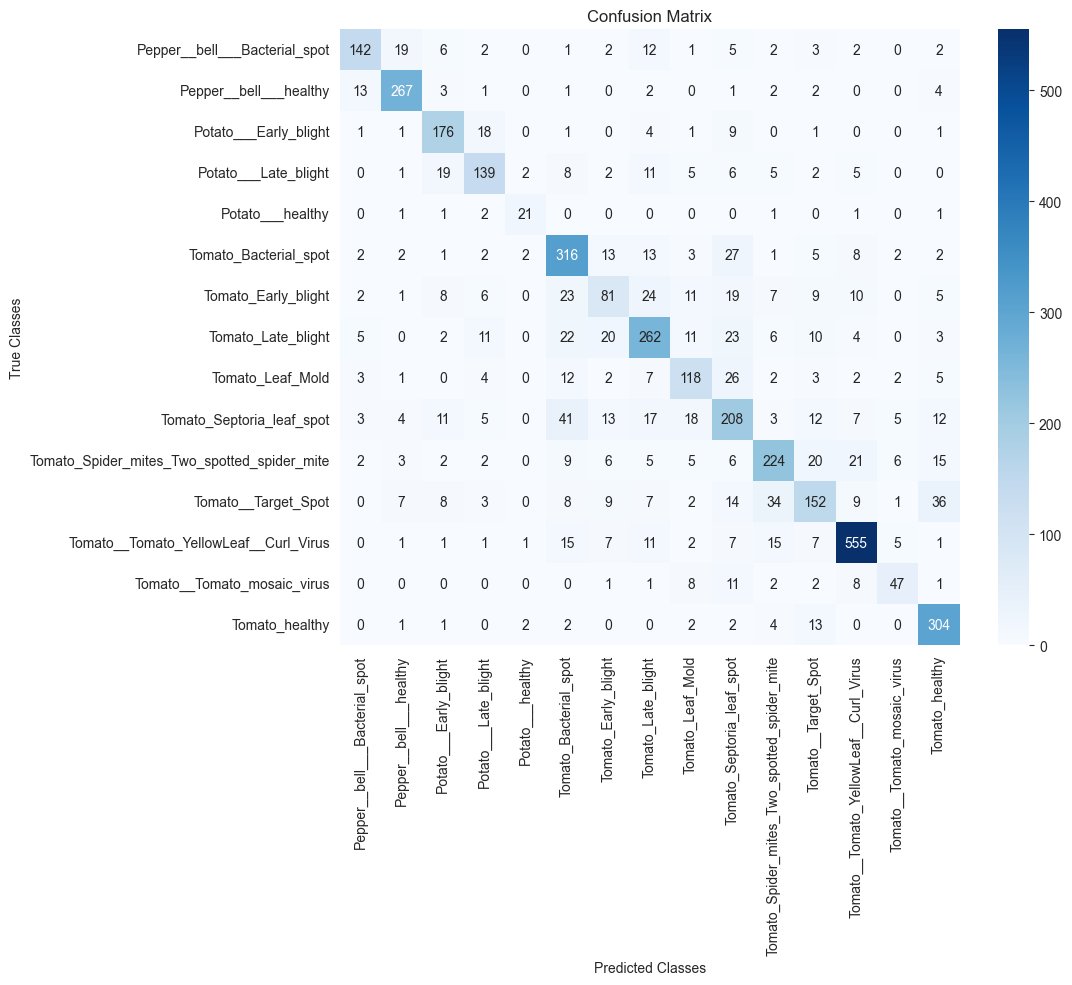

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.82      0.71      0.76       199
                     Pepper__bell___healthy       0.86      0.90      0.88       296
                      Potato___Early_blight       0.74      0.83      0.78       213
                       Potato___Late_blight       0.71      0.68      0.69       205
                           Potato___healthy       0.75      0.75      0.75        28
                      Tomato_Bacterial_spot       0.69      0.79      0.74       399
                        Tomato_Early_blight       0.52      0.39      0.45       206
                         Tomato_Late_blight       0.70      0.69      0.69       379
                           Tomato_Leaf_Mold       0.63      0.63      0.63       187
                  Tomato_Septoria_leaf_spot       0.57      0.58      0.58       359
Tomato_Spider_mites_Two_spotted_spider_mi

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import seaborn as sns

# Define project constants
IMAGE_SIZE = 80
COLORS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, COLORS)
BATCH_SIZE = 64
RANDOM_STATE = 42
classification_types = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
    'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
    'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]
data_dir = '../PlantVillage'

# Load dataset
train_data = []
for id, disease in enumerate(classification_types):
    dir_path = os.path.join(data_dir, disease)
    for file in os.listdir(dir_path):
        train_data.append([os.path.join(disease, file), id, disease, os.path.join(dir_path, file)])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID', 'Disease_Type', 'File_Path'])
train = train.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

# Display random images
def display_random_images(rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    random = train.sample(rows * cols)
    for i in range(rows):
        for j in range(cols):
            row_data = random.iloc[i * cols + j]
            image_path = os.path.join(data_dir, row_data['File'])
            disease_type = row_data['Disease_Type']
            ax[i, j].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
            ax[i, j].axis('off')
            ax[i, j].set_title(disease_type, fontsize=10)

display_random_images(3, 3)

# Preprocess data
def get_training_data():
    data = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, COLORS))
    for i, file in tqdm(enumerate(train['File'].values)):
        img = cv2.imread(os.path.join(data_dir, file))
        if img is not None:
            img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
            img_resized = img_resized / 255.0
            data[i] = img_resized
    return data

X = get_training_data()
y = to_categorical(train['DiseaseID'], num_classes=len(classification_types))

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
NUM_CLASSES = len(classification_types)

print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

# Define InceptionV3 Model
def inceptionv3_model(input_shape, num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model

    model = Sequential([
        base_model,
        BatchNormalization(),
        Dropout(0.45),
        GlobalAveragePooling2D(),
        Dense(220, activation='relu'),
        Dropout(0.45),
        Dense(60, activation='relu'),
        Dense(num_classes, activation='softmax', name="root")
    ])
    return model

# Build and compile model
model = inceptionv3_model(INPUT_SHAPE, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train the model
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_inceptionv3_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=BATCH_SIZE, callbacks=[early_stopping, checkpoint])

# Plot accuracy and loss
sns.set_style("darkgrid")
best_epoch = np.argmax(history.history['val_accuracy']) + 1

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(history.history["accuracy"], label="Training Accuracy", color="blue")
axs[0].plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
axs[0].scatter(best_epoch - 1, history.history["val_accuracy"][best_epoch - 1], color="green", label=f"Best Epoch: {best_epoch}")
axs[0].set_title("Training vs Validation Accuracy")
axs[0].legend()

axs[1].plot(history.history["loss"], label="Training Loss", color="blue")
axs[1].plot(history.history["val_loss"], label="Validation Loss", color="red")
axs[1].scatter(best_epoch - 1, history.history["val_loss"][best_epoch - 1], color="green", label=f"Best Epoch: {best_epoch}")
axs[1].set_title("Training vs Validation Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate and save the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

model.save("../saved models/inceptionv3_plant_disease_model.keras")
print("InceptionV3 model saved as 'inceptionv3_plant_disease_model.keras'.")

# Predictions and confusion matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classification_types, yticklabels=classification_types)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classification_types))
